## Load and Check Data

In [1]:
# The OS module in Python provides functions for interacting with the operating system
import os

# import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the wrangled data
df = pd.read_csv('bookings_wrangled.csv', index_col=[0]) #index_col=[0] to get rid of the 'Unnamed: 0' column
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119386, 31)

## Encoding Categorical Variables

In [4]:
df.info()
# noncategorical: 'lead_time'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

In [5]:
# convert some int's to floats and vice versa

to_float = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',\
          'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list',\
           'required_car_parking_spaces', 'total_of_special_requests']

to_int = ['children', 'agent']


for col in to_float:
    df[col] = pd.to_numeric(df[col], downcast='float')
    
for col in to_int:
    df[col]=df[col].astype('int')
    
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                         float32
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights           float32
stays_in_week_nights              float32
adults                              int64
children                            int32
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations            float32
previous_bookings_not_canceled    float32
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
# bin the countries
df.country.value_counts().head()

PRT    48588
GBR    12127
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

In [7]:
# want bins = [Portugal, Other]
# would binning into continents be useful?

# map countries to regions
mapping = pd.read_csv('continents2.csv', index_col=None, usecols=['alpha-3', 'region'])
mapping.head()

,alpha-3,region
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania


In [8]:
# add XXX, 'unknown' to mapping
mapping.loc[len(mapping.index)] = ['XXX', 'unknown'] 
mapping.tail()

,alpha-3,region
245,ESH,Africa
246,YEM,Asia
247,ZMB,Africa
248,ZWE,Africa
249,XXX,unknown


In [9]:
# left join df with mapping to map the region
df1 = df.merge(mapping, how='left', left_on='country' , right_on='alpha-3')
df1[['country', 'region', 'alpha-3']].sample(10)
df1.columns[df1.isna().any()]

Index(['alpha-3', 'region'], dtype='object')

In [10]:
df1[df1['alpha-3'].isna()][['alpha-3', 'region', 'country']]

,alpha-3,region,country
143,NaN,NaN,CN
163,NaN,NaN,CN
307,NaN,NaN,CN
340,NaN,NaN,CN
524,NaN,NaN,CN
...,...,...,...
119052,NaN,NaN,CN
119216,NaN,NaN,CN
119223,NaN,NaN,CN
119298,NaN,NaN,CN


In [11]:
df1[df1['alpha-3'].isna()].country.unique()

array(['CN', 'TMP'], dtype=object)

In [12]:
# google: CN = China, TMP = East Timor; both in Asia
# fill those in with 'Asia'
df1['region'].fillna('Asia', inplace=True)

df1.region.isna().sum() # check to see if region still has NaN's

0

In [13]:
# we no longer need 'alpha-3' b/c that info is from country
df1.drop('alpha-3', axis=1, inplace=True)
df1.isna().sum().sum() # check if df1 still has NaN's

0

In [14]:
df1.region.unique() # region sanity check

array(['Europe', 'Americas', 'unknown', 'Asia', 'Oceania', 'Africa'],
      dtype=object)

In [15]:
# let's see how many travellers are from each region
pd.DataFrame({'count':df1.region.value_counts(), '%':df1.region.value_counts(normalize=True)*100})
# majority are from Europe; Americas and Asia are 2nd, 3rd but far from Europe

,count,%
Europe,107822,90.313772
Americas,4982,4.173019
Asia,4473,3.746670
Africa,1114,0.933108
Oceania,507,0.424673
unknown,488,0.408758


In [16]:
# do country binning, Portugal vs Other
#country_counts = df1.country.value_counts()
mask = df1.country == 'PRT'

# Label all other categories as Other
df1.country[mask] = 'Portugal'
df1.country[~(mask)] = 'Other'

df1.country.unique()

C:\Users\KNguyen\AppData\Local\Temp\ipykernel_8148\1786487989.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.country[mask] = 'Portugal'
C:\Users\KNguyen\AppData\Local\Temp\ipykernel_8148\1786487989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.country[~(mask)] = 'Other'


array(['Portugal', 'Other'], dtype=object)

In [17]:
pd.DataFrame({'count':df1.country.value_counts(), '%':df1.country.value_counts(normalize=True)*100})

,count,%
Other,70798,59.301761
Portugal,48588,40.698239


In [18]:
# country binning and regional binning complete
# check other categorical variables to see if they need binning
df1.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'region'],
      dtype='object')

In [19]:
cat_cols = ['hotel',  'meal', 'country',\
           'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',\
           'deposit_type', 'customer_type', 'reservation_status', 'region']

for col in cat_cols:
    print(col, df1[col].nunique())

hotel 2
meal 5
country 2
market_segment 8
distribution_channel 5
is_repeated_guest 2
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status 3
region 6


In [20]:
for col in cat_cols:
    #print(col)
    counts = pd.DataFrame({col:df1[col].value_counts(), '%': df1[col].value_counts(normalize=True)*100})
    display(counts)

,hotel,%
City Hotel,79328,66.446652
Resort Hotel,40058,33.553348


,meal,%
BB,92306,77.317273
HB,14463,12.114486
SC,10650,8.920644
Undefined,1169,0.979177
FB,798,0.668420


,country,%
Other,70798,59.301761
Portugal,48588,40.698239


,market_segment,%
Online TA,56476,47.305379
Offline TA/TO,24218,20.285461
Groups,19810,16.593235
Direct,12606,10.559027
Corporate,5294,4.434356
Complementary,743,0.622351
Aviation,237,0.198516
Undefined,2,0.001675


,distribution_channel,%
TA/TO,97868,81.976111
Direct,14644,12.266095
Corporate,6676,5.591945
GDS,193,0.161660
Undefined,5,0.004188


,is_repeated_guest,%
0,115577,96.809509
1,3809,3.190491


,reserved_room_type,%
A,85992,72.028546
D,19199,16.081450
E,6535,5.473841
F,2897,2.426583
G,2094,1.753975
B,1118,0.936458
C,932,0.780661
H,601,0.503409
P,12,0.010051
L,6,0.005026


,assigned_room_type,%
A,74053,62.028211
D,25320,21.208517
E,7806,6.538455
F,3751,3.141909
G,2553,2.138442
C,2375,1.989345
B,2162,1.810933
H,711,0.595547
I,363,0.304056
K,279,0.233696


,deposit_type,%
No Deposit,104637,87.645955
Non Refund,14587,12.218351
Refundable,162,0.135694


,customer_type,%
Transient,89612,75.060727
Transient-Party,25122,21.042668
Contract,4075,3.413298
Group,577,0.483306


,reservation_status,%
Check-Out,75163,62.957968
Canceled,43017,36.031863
No-Show,1206,1.010169


,region,%
Europe,107822,90.313772
Americas,4982,4.173019
Asia,4473,3.746670
Africa,1114,0.933108
Oceania,507,0.424673
unknown,488,0.408758


In [21]:
# bin market_segment: count <10000 becomes 'other'
# ms other = mainly corporate, comp, aviation, undefined
mask_dict = {'market_segment': 10000, 'distribution_channel': 10000}

for col, val in mask_dict.items():
    counts = df1[col].value_counts()
    masks = df1[col].isin(counts[counts < val].index)
    df1.loc[masks,col] = 'Other'

# same with distribution_channel
# dc other = mainly corporate, gds, undefined

In [22]:
# check if above works

for col in ['market_segment', 'distribution_channel']:
    #print(col)
    counts = pd.DataFrame(df1[col].value_counts())
    display(counts)
    
# yes, it works

,market_segment
Online TA,56476
Offline TA/TO,24218
Groups,19810
Direct,12606
Other,6276


,distribution_channel
TA/TO,97868
Direct,14644
Other,6874


In [23]:
# feature engineering
# nights_stayed = stays_in_weekend_nights + stays_in_week_nights
df1['nights_stayed'] = df1.stays_in_weekend_nights + df1.stays_in_week_nights


In [24]:
# should've been in the wrangling section
# sanity check: it's impossible to stay more weekends than weekdays if weekends > 2
len(df1[(df1.stays_in_weekend_nights > df1.stays_in_week_nights) & (df1.stays_in_weekend_nights >2)])

0

In [25]:
# something with reservation_status and reservation_status_date?
# understand when the booking cancelled or when did the customer check out

# since we are focused on cancellations, it might be useful to see how early the customer cancelled
df1[df1.is_canceled == 1][['reservation_status_date',\
                           'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',\
                           'lead_time']].head(10)

,reservation_status_date,arrival_date_year,arrival_date_month,arrival_date_day_of_month,lead_time
8,2015-05-06,2015,July,1,85.0
9,2015-04-22,2015,July,1,75.0
10,2015-06-23,2015,July,1,23.0
27,2015-05-11,2015,July,1,60.0
32,2015-05-29,2015,July,1,96.0
34,2015-05-19,2015,July,2,45.0
35,2015-06-19,2015,July,2,40.0
38,2015-05-23,2015,July,2,43.0
40,2015-05-18,2015,July,2,45.0
45,2015-06-02,2015,July,2,47.0


In [26]:
# smush 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' into a datetime

m = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
    }

df1['arrival_month_num'] = df1.arrival_date_month.map(m)
df1[['arrival_month_num', 'arrival_date_month']].sample(10)

,arrival_month_num,arrival_date_month
72450,7,July
118005,8,August
85266,3,March
75851,9,September
100546,10,October
114311,6,June
95293,8,August
3903,2,February
80891,12,December
108400,3,March


In [27]:
# previous attempt there was a mismatch with 63003; check again
df1.loc[63003][['arrival_date_month', 'arrival_month_num']]
# looks correct

arrival_date_month    January
arrival_month_num           1
Name: 63003, dtype: object

In [28]:
# squoosh arrival columns into a datetime

df1['arrival_date'] = pd.to_datetime(df1['arrival_date_year'].astype(str) + '-' +\
                                               df1['arrival_month_num'].astype(str) + '-' +\
                                               df1['arrival_date_day_of_month'].astype(str))
# removing the format part seems to work

df1[['arrival_date','arrival_date_year', 'arrival_month_num', 'arrival_date_month', 'arrival_date_day_of_month']].loc[63003]
#problem child is correct!

arrival_date                 2017-01-26 00:00:00
arrival_date_year                           2017
arrival_month_num                              1
arrival_date_month                       January
arrival_date_day_of_month                     26
Name: 63003, dtype: object

In [29]:
# check that datetimes are datetimes
print(df1.arrival_date.dtype)
print(df1.reservation_status_date.dtype)

datetime64[ns]
object


In [30]:
# convert reservation_status_date to datetime
df1['reservation_status_date'] = pd.to_datetime(df1.reservation_status_date)
print(df1.reservation_status_date.dtype) #fixed

datetime64[ns]


In [31]:
df1[['is_canceled', 'reservation_status_date', 'arrival_date', 'lead_time']].sample(10)

,is_canceled,reservation_status_date,arrival_date,lead_time
11449,1,2016-08-25,2017-05-09,302.0
107723,0,2017-03-17,2017-03-10,62.0
42633,0,2015-09-09,2015-09-08,0.0
20067,0,2016-01-16,2016-01-13,1.0
93114,0,2016-07-17,2016-07-15,84.0
39627,0,2017-08-24,2017-08-17,211.0
62875,1,2016-11-25,2017-01-23,59.0
12630,1,2017-05-12,2017-07-09,61.0
65717,1,2016-09-28,2017-04-06,191.0
62328,1,2016-11-28,2017-01-08,41.0


In [32]:
# when (# days before arrival date) did people cancel?
# define resv_time = arrival_date - resveration_status_date. 

# time difference function
def time_diff(t1, t2):
    try:
        return (np.abs(t1-t2) / np.timedelta64(1, 'D'))
    except:
        print('Error!!!')
    
# adding the np.timedelta64() fixes output -- otherwise, it'll say 56 days instead of 56.0
# need abs() otherwise divison won't work

In [33]:
df1['resv_time'] = time_diff(df1.arrival_date, df1.reservation_status_date)

df1.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,region,nights_stayed,arrival_month_num,arrival_date,resv_time
0,Resort Hotel,0,342.0,2015,July,27,1,0.0,0.0,2,...,0.0,0.0,0.0,Check-Out,2015-07-01,Europe,0.0,7,2015-07-01,0.0
1,Resort Hotel,0,737.0,2015,July,27,1,0.0,0.0,2,...,0.0,0.0,0.0,Check-Out,2015-07-01,Europe,0.0,7,2015-07-01,0.0
2,Resort Hotel,0,7.0,2015,July,27,1,0.0,1.0,1,...,75.0,0.0,0.0,Check-Out,2015-07-02,Europe,1.0,7,2015-07-01,1.0
3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1.0,1,...,75.0,0.0,0.0,Check-Out,2015-07-02,Europe,1.0,7,2015-07-01,1.0
4,Resort Hotel,0,14.0,2015,July,27,1,0.0,2.0,2,...,98.0,0.0,1.0,Check-Out,2015-07-03,Europe,2.0,7,2015-07-01,2.0
5,Resort Hotel,0,14.0,2015,July,27,1,0.0,2.0,2,...,98.0,0.0,1.0,Check-Out,2015-07-03,Europe,2.0,7,2015-07-01,2.0
6,Resort Hotel,0,0.0,2015,July,27,1,0.0,2.0,2,...,107.0,0.0,0.0,Check-Out,2015-07-03,Europe,2.0,7,2015-07-01,2.0
7,Resort Hotel,0,9.0,2015,July,27,1,0.0,2.0,2,...,103.0,0.0,1.0,Check-Out,2015-07-03,Europe,2.0,7,2015-07-01,2.0
8,Resort Hotel,1,85.0,2015,July,27,1,0.0,3.0,2,...,82.0,0.0,1.0,Canceled,2015-05-06,Europe,3.0,7,2015-07-01,56.0
9,Resort Hotel,1,75.0,2015,July,27,1,0.0,3.0,2,...,105.5,0.0,0.0,Canceled,2015-04-22,Europe,3.0,7,2015-07-01,70.0


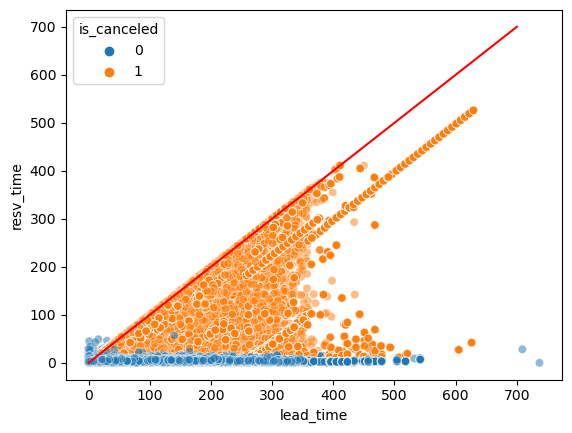

In [34]:
g = sns.scatterplot(data=df1, y='resv_time', x='lead_time', hue='is_canceled', alpha=0.5)

# plot y=x
X_plot = np.linspace(0, 700, 100)
Y_plot = X_plot
#g = sns.FacetGrid(data, height = 6)
#g = g.map(plt.scatter, "usable_area", "price", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()

In [35]:
# all orange points under line y=x, which makes sense. Cancellation time should be less than lead time.
# a few blues above the line, but that makes sense, since that denotes the number of nights stayed.

In [36]:
# but first, we bin the months into seasons: spring, summer, fall, winter so we have less categories.
seasons = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', \
          7: 'summer', 8: 'summer', 9: 'fall', 10: 'fall', 11: 'fall', 12: 'winter'}

df1['arrival_season'] = df1.arrival_month_num.map(seasons)

df1[['arrival_date', 'arrival_season']].sample(10)

,arrival_date,arrival_season
82986,2016-01-08,winter
8967,2016-10-22,fall
60113,2016-11-05,fall
114932,2017-06-27,summer
49326,2016-04-10,spring
64031,2017-02-26,winter
32202,2017-01-16,winter
61327,2016-12-08,winter
92451,2016-07-06,summer
14775,2015-08-08,summer


In [37]:
# now we have arrival_date, we can drop its month, day, week, and year components.
arrival_drop = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month',\
               'arrival_month_num']

# call this df2
df2 = df1.drop(columns=arrival_drop)

In [38]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'region',
       'nights_stayed', 'arrival_date', 'resv_time', 'arrival_season'],
      dtype='object')

In [39]:
len(df2.columns)

32

<AxesSubplot:xlabel='lead_time', ylabel='resv_time'>

<Figure size 2000x1500 with 0 Axes>

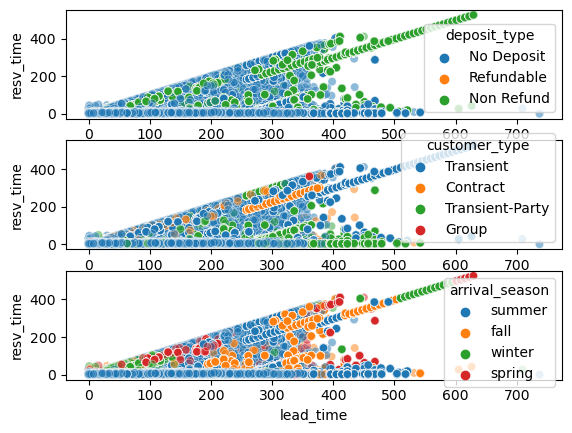

In [40]:
# there are some orange lines... do they represent, say, a customer type?
plt.figure(figsize=(20,15))
fig, axs = plt.subplots(3)
#fig.suptitle('Vertically stacked subplots')
sns.scatterplot(data=df1, y='resv_time', x='lead_time', hue='deposit_type', alpha=0.5, ax=axs[0])
sns.scatterplot(data=df1, y='resv_time', x='lead_time', hue='customer_type', alpha=0.5, ax=axs[1])
sns.scatterplot(data=df1, y='resv_time', x='lead_time', hue='arrival_season', alpha=0.5, ax=axs[2])

In [41]:
#sns.pairplot(df2)
#plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

In [42]:
#sns.heatmap(df2.corr())

In [43]:
# encoding
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119385
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119386 non-null  object        
 1   is_canceled                     119386 non-null  int64         
 2   lead_time                       119386 non-null  float32       
 3   stays_in_weekend_nights         119386 non-null  float32       
 4   stays_in_week_nights            119386 non-null  float32       
 5   adults                          119386 non-null  int64         
 6   children                        119386 non-null  int32         
 7   babies                          119386 non-null  int64         
 8   meal                            119386 non-null  object        
 9   country                         119386 non-null  object        
 10  market_segment                  119386 non-null  object 

In [44]:
# don't drop these yet, they might be useful
#df2.drop(columns=['reserved_room_type', 'assigned_room_type'], inplace=True)

In [45]:
# we won't drop the 1st variable for EDA, but we will for preprocessing/modelling
df2_ohe = pd.get_dummies(df2, drop_first=False)

In [46]:
df2_ohe.head().T

,0,1,2,3,4
is_canceled,0,0,0,0,0
lead_time,342.0,737.0,7.0,13.0,14.0
stays_in_weekend_nights,0.0,0.0,0.0,0.0,0.0
stays_in_week_nights,0.0,0.0,1.0,1.0,2.0
adults,2,2,1,1,2
...,...,...,...,...,...
region_unknown,0,0,0,0,0
arrival_season_fall,0,0,0,0,0
arrival_season_spring,0,0,0,0,0
arrival_season_summer,1,1,1,1,1


In [47]:
print(df2_ohe.is_canceled.mean())
print(df2_ohe.is_canceled.median())

0.3704203172901345
0.0


<AxesSubplot:>

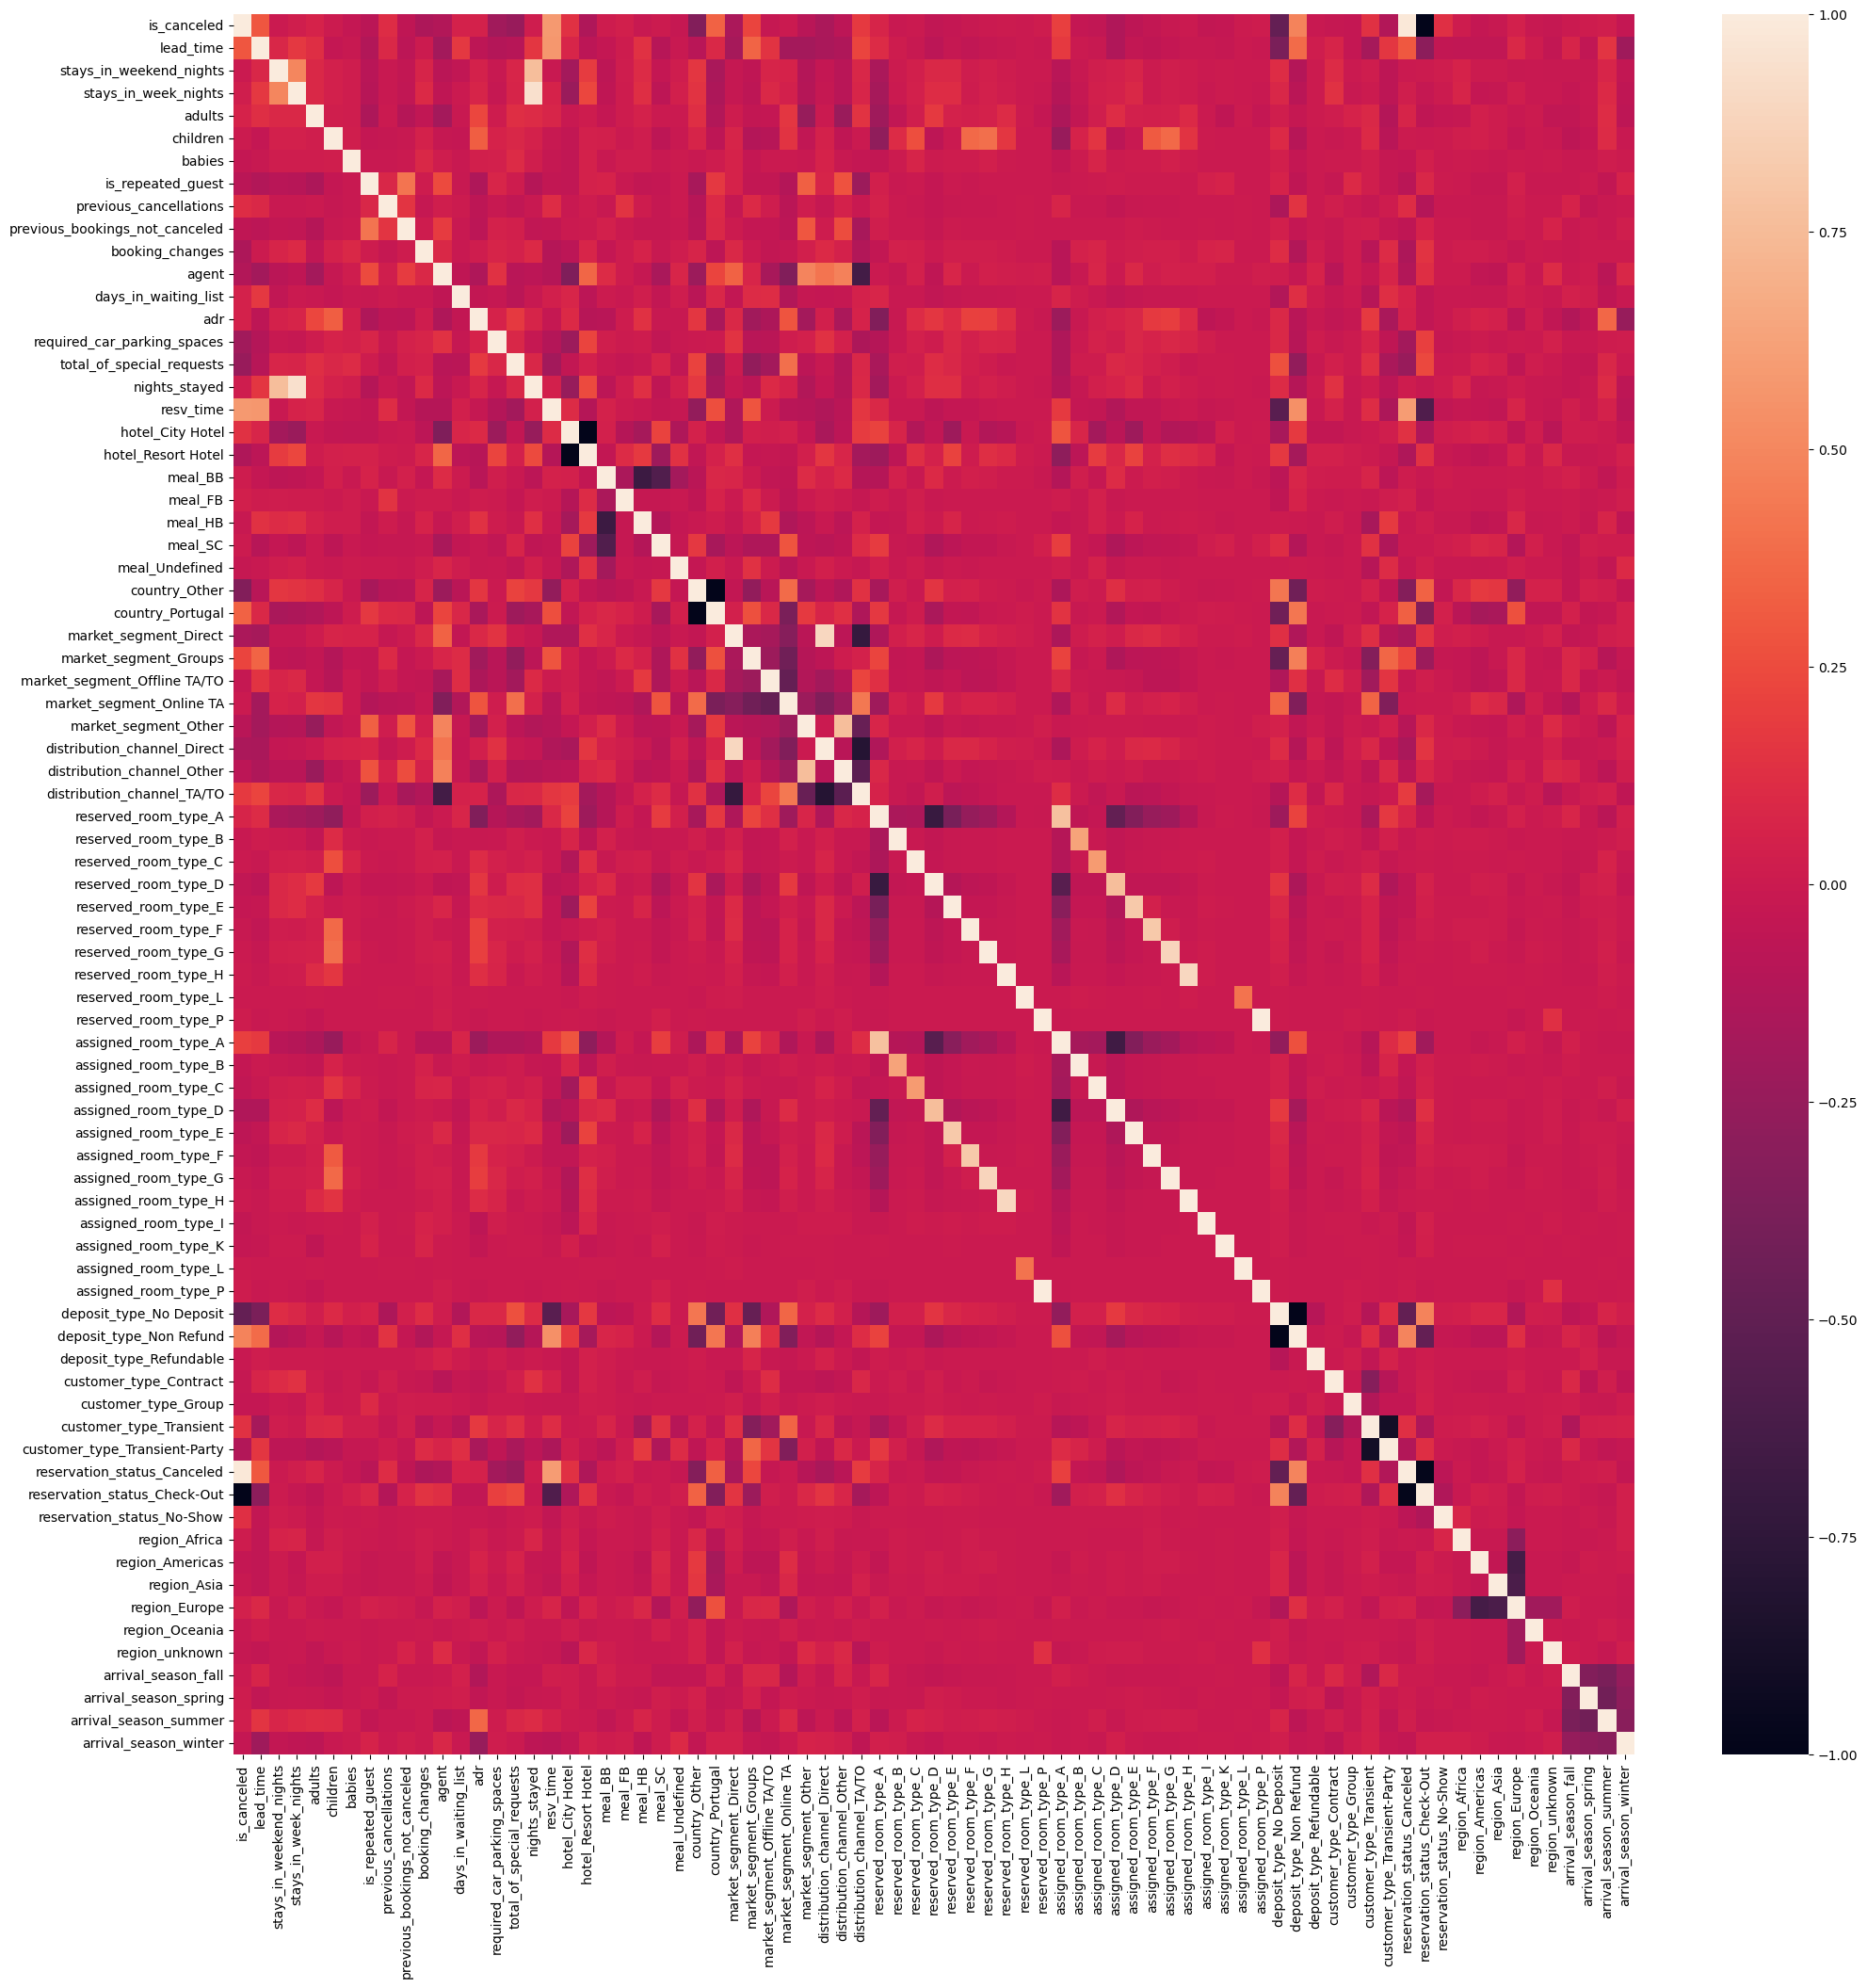

In [48]:
plt.subplots(figsize=(24, 24))
sns.heatmap(df2_ohe.corr())

**Negative correlations**
<br>
* meal_HB & meal_BB 
* city hotel & babies (weak) 
* not Portugal & is_canceled (weak)
* DC TA/TO & agent, DC Direct, MS other, MS direct
* Reserved room type A & Reserved room type D 
* No Deposit & is_canceled, reservation_time, Portugal
* Transient customer type & MS group 
* Transient party customer type & MS Online TA 
* No deposit & a lot of things 
* Nonrefundable deposit and other country


**Positive correlations from heatmap**
<br>
* is_canceled & lead_time 
* stays_in_weekend_nights & stays_in_week_nights & nights_stayed
* previous_bookings_not_canceled & is_repeated_guest 
* agent & is_repeated_guest, resort, MS direct, MS other, DC direct, DC other (some weak) 
* adr & children, adults (kind of weak) 
* reservation_time & is_canceled, lead_time 
* Portugal & is_canceled, resveration_time (weak) 
* most assigned room types are highly correlated to their reserved room types 
* nonrefundable deposit & is_canceled, lead_time, reservation_time 
* nonrefundable deposit & Portugal (weaker)

In [49]:
# scatterplots function from guided capstone
# modify to barplots function for this project

def hbarplots(columns, ncol=None, figsize=(15, 8), estimator='mean'):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        g=sns.barplot(x = 'is_canceled', y = col, data=df2_ohe, alpha=0.5, ax=ax, orient='h', estimator=estimator)
        ax.set(xlabel='Is Cancelled', ylabel=col)
        g.axvline(x = df2_ohe.is_canceled.mean(), color = 'r', label = 'avg amt of cancellations')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [50]:
# discrete variables
noncts = df2_ohe.select_dtypes(exclude=['float64', 'float32', 'datetime64[ns]']).columns

# cts variables
cts = df2_ohe.select_dtypes(include=['float64', 'float32', 'datetime64[ns]']).columns

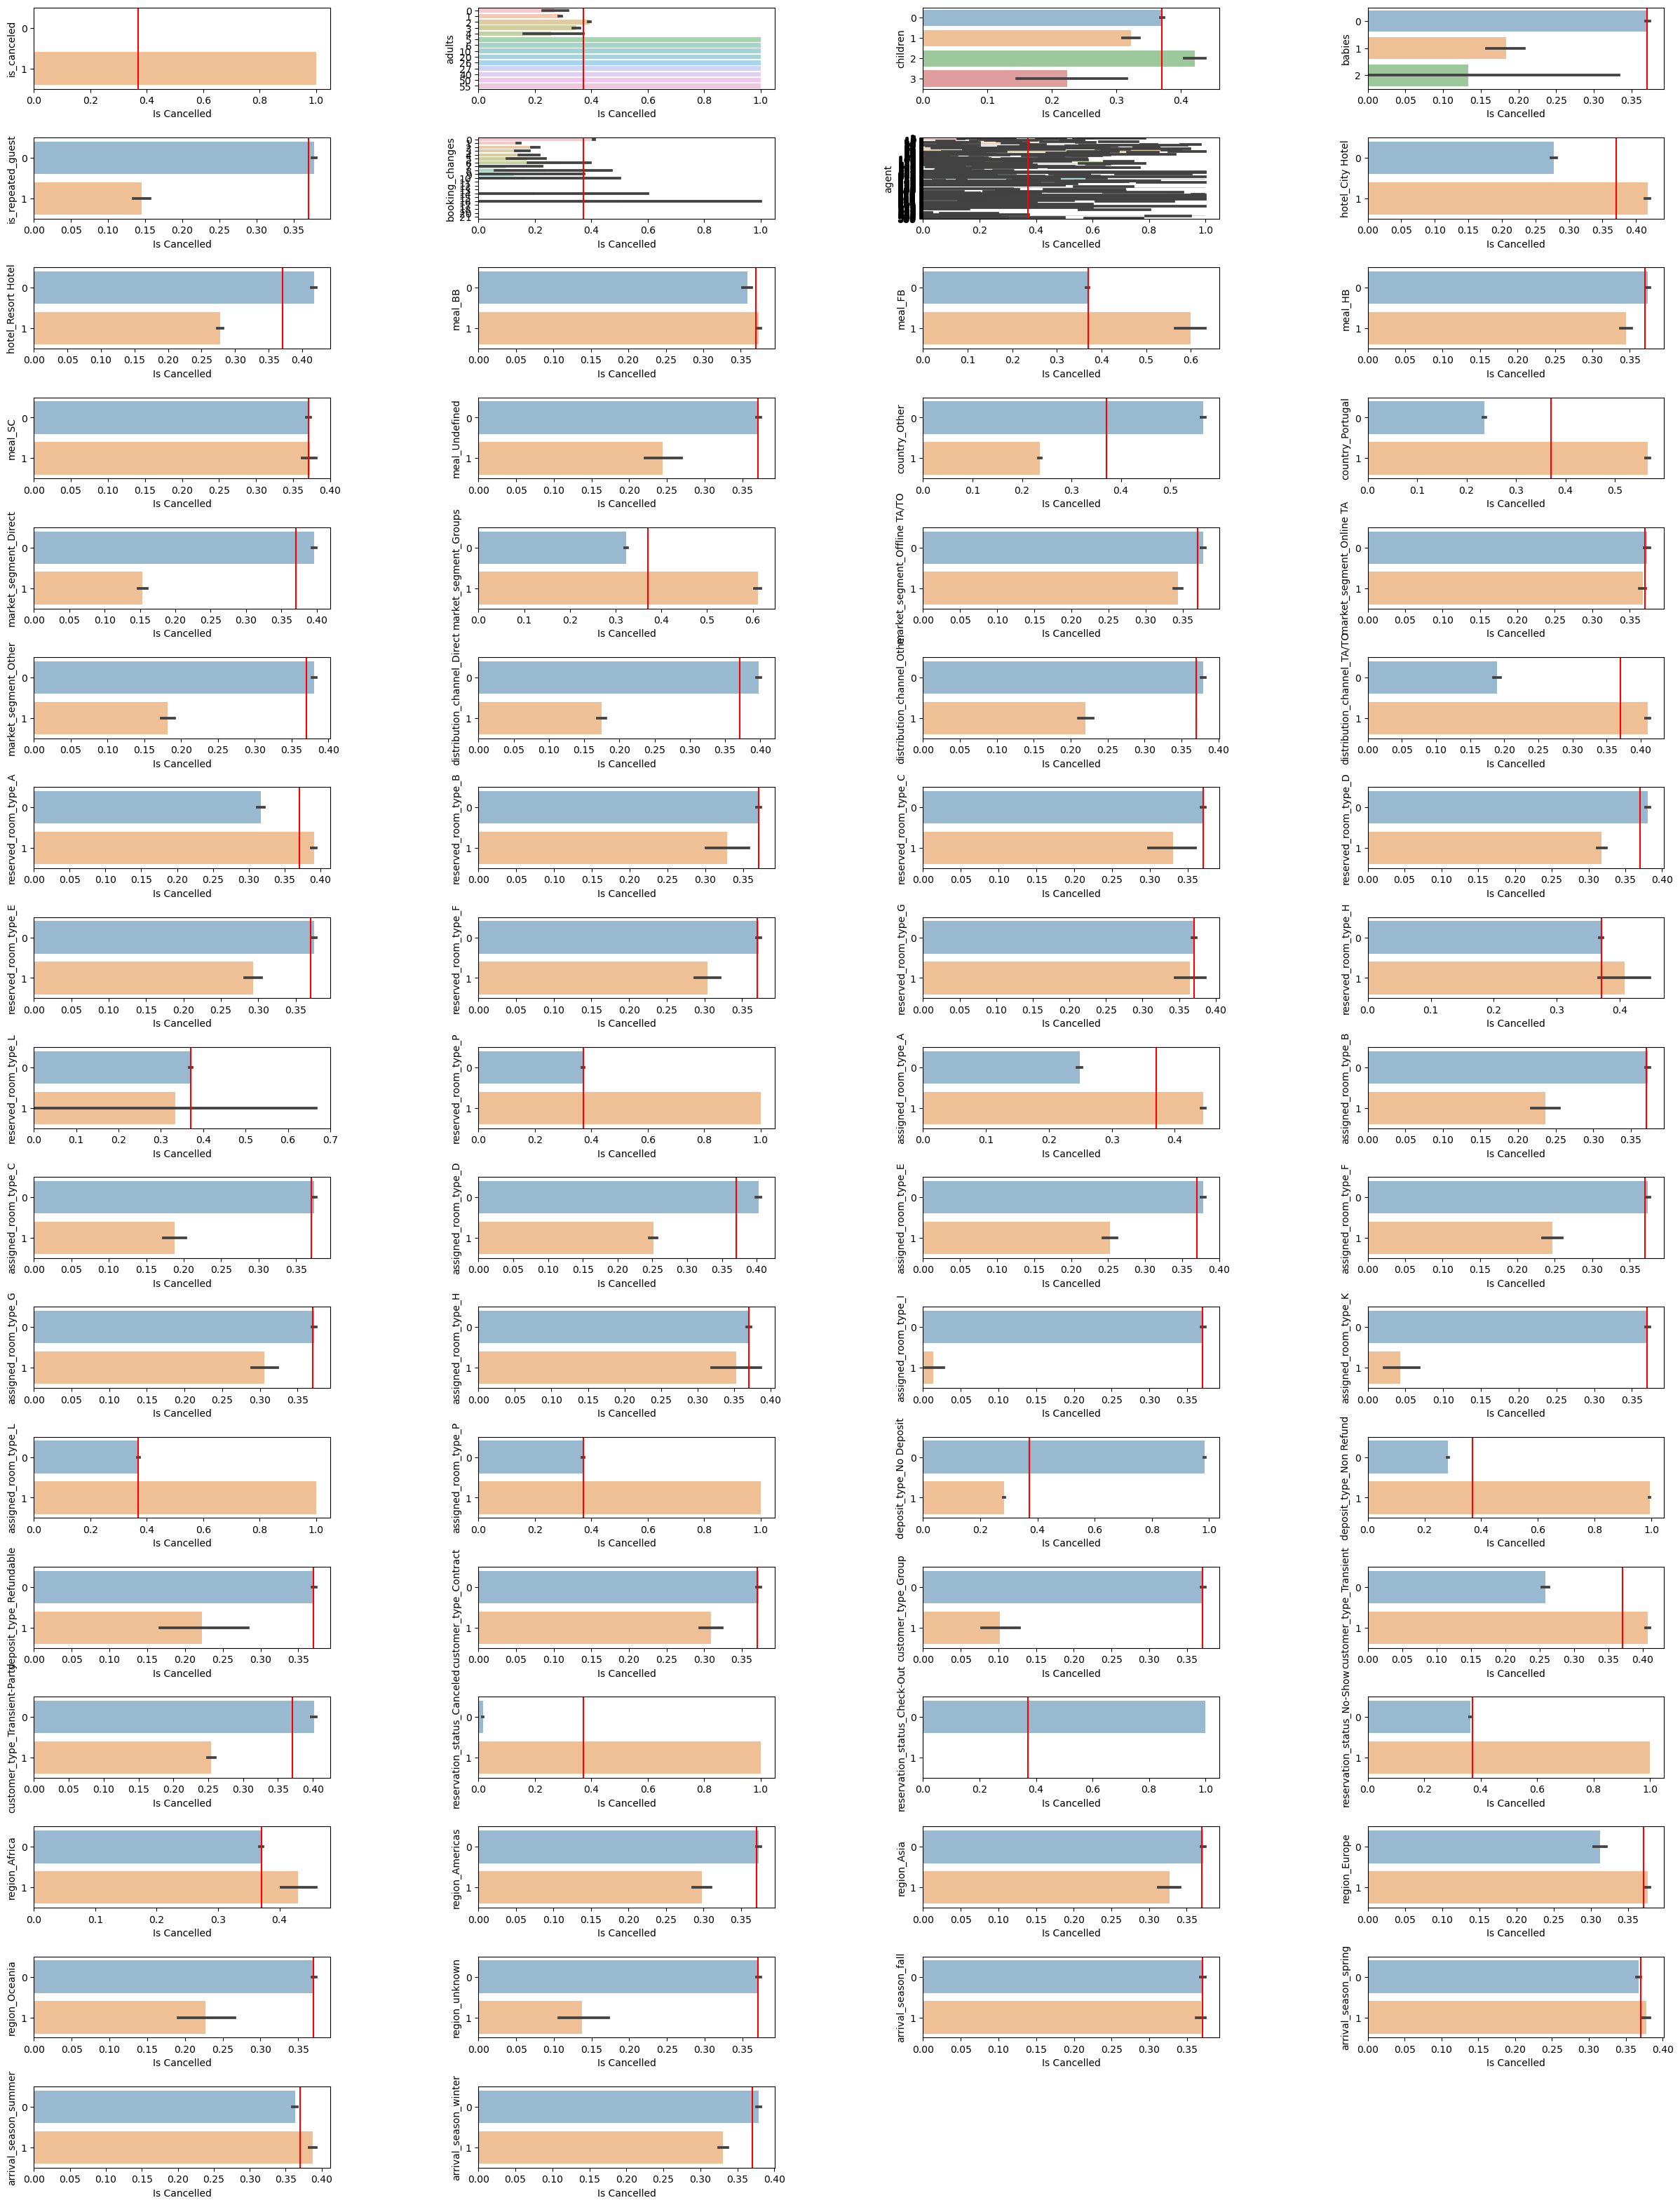

In [51]:
hbarplots(noncts, ncol=4, figsize=(30, 40))

**Observations from the barplots:**
<br>
The following have way less cancellations than average (which is about 37%):
<br>
* Assigned rooms: C, E, P, D, K, F, B, I 
* Region: Oceania (23% cancelled vs 37% not cancelled), unknown 
* Meals: undefined 
* Distribution channel: Direct, other 
* Repeated guests (15% cancelled vs 38% not cancelled)
* Resort hotel (27% cancelled vs 42% not cancelled) 
* Market segment: Direct, other 
* Customer type: Group 
* Country: Not Portugal (24% cancelled vs 57% not cancelled) 
* Deposit type: no deposit, refundable


And the following have more cancellations than average:
<br>

*  City hotel (42% cancellation) 
*  Region: Africa (45% cancellation) 
*  Assigned rooms: L, P with 100% cancellation 
*  Reserved rooms: P 
*  Market segment: Groups 
*  Meals: FB 
*  Country: Portugal 
*  Distribution Channel: TA/TO 
*  Deposit type: Nonrefundable 
* 5+ adults (100% cancellation)

<br>
What's weird is that Customer type: group has less cancellations than average, yet market segment groups have more...
<br>
And before modelling, we should drop the reservation_status column... 

In [69]:
# compare the cts variables

# scatterplots ftn from Guided Capstone, modified to histplots to fit our data
def histplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        # don't show the outliers;
        # code from Datacamp Feature Engineering course, modified
        # Find the mean and standard dev
        std = df2_ohe[col].std()
        mean = df2_ohe[col].mean()

        # Calculate the cutoff
        cut_off = std * 3
        lower, upper = mean - cut_off, mean + cut_off

        # Trim the outliers
        trimmed_df = df2_ohe[(df2_ohe[col] < upper)\
                                   & (df2_ohe[col] > lower)]

        # The trimmed plot
        g=sns.histplot(x = col, data=trimmed_df, alpha=0.5, ax=ax, hue='is_canceled', stat='probability')
        ax.set(xlabel=col)
        #g.axhline(y = df2_ohe.is_canceled.mean(), color = 'r', label = 'avg amt of cancellations')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

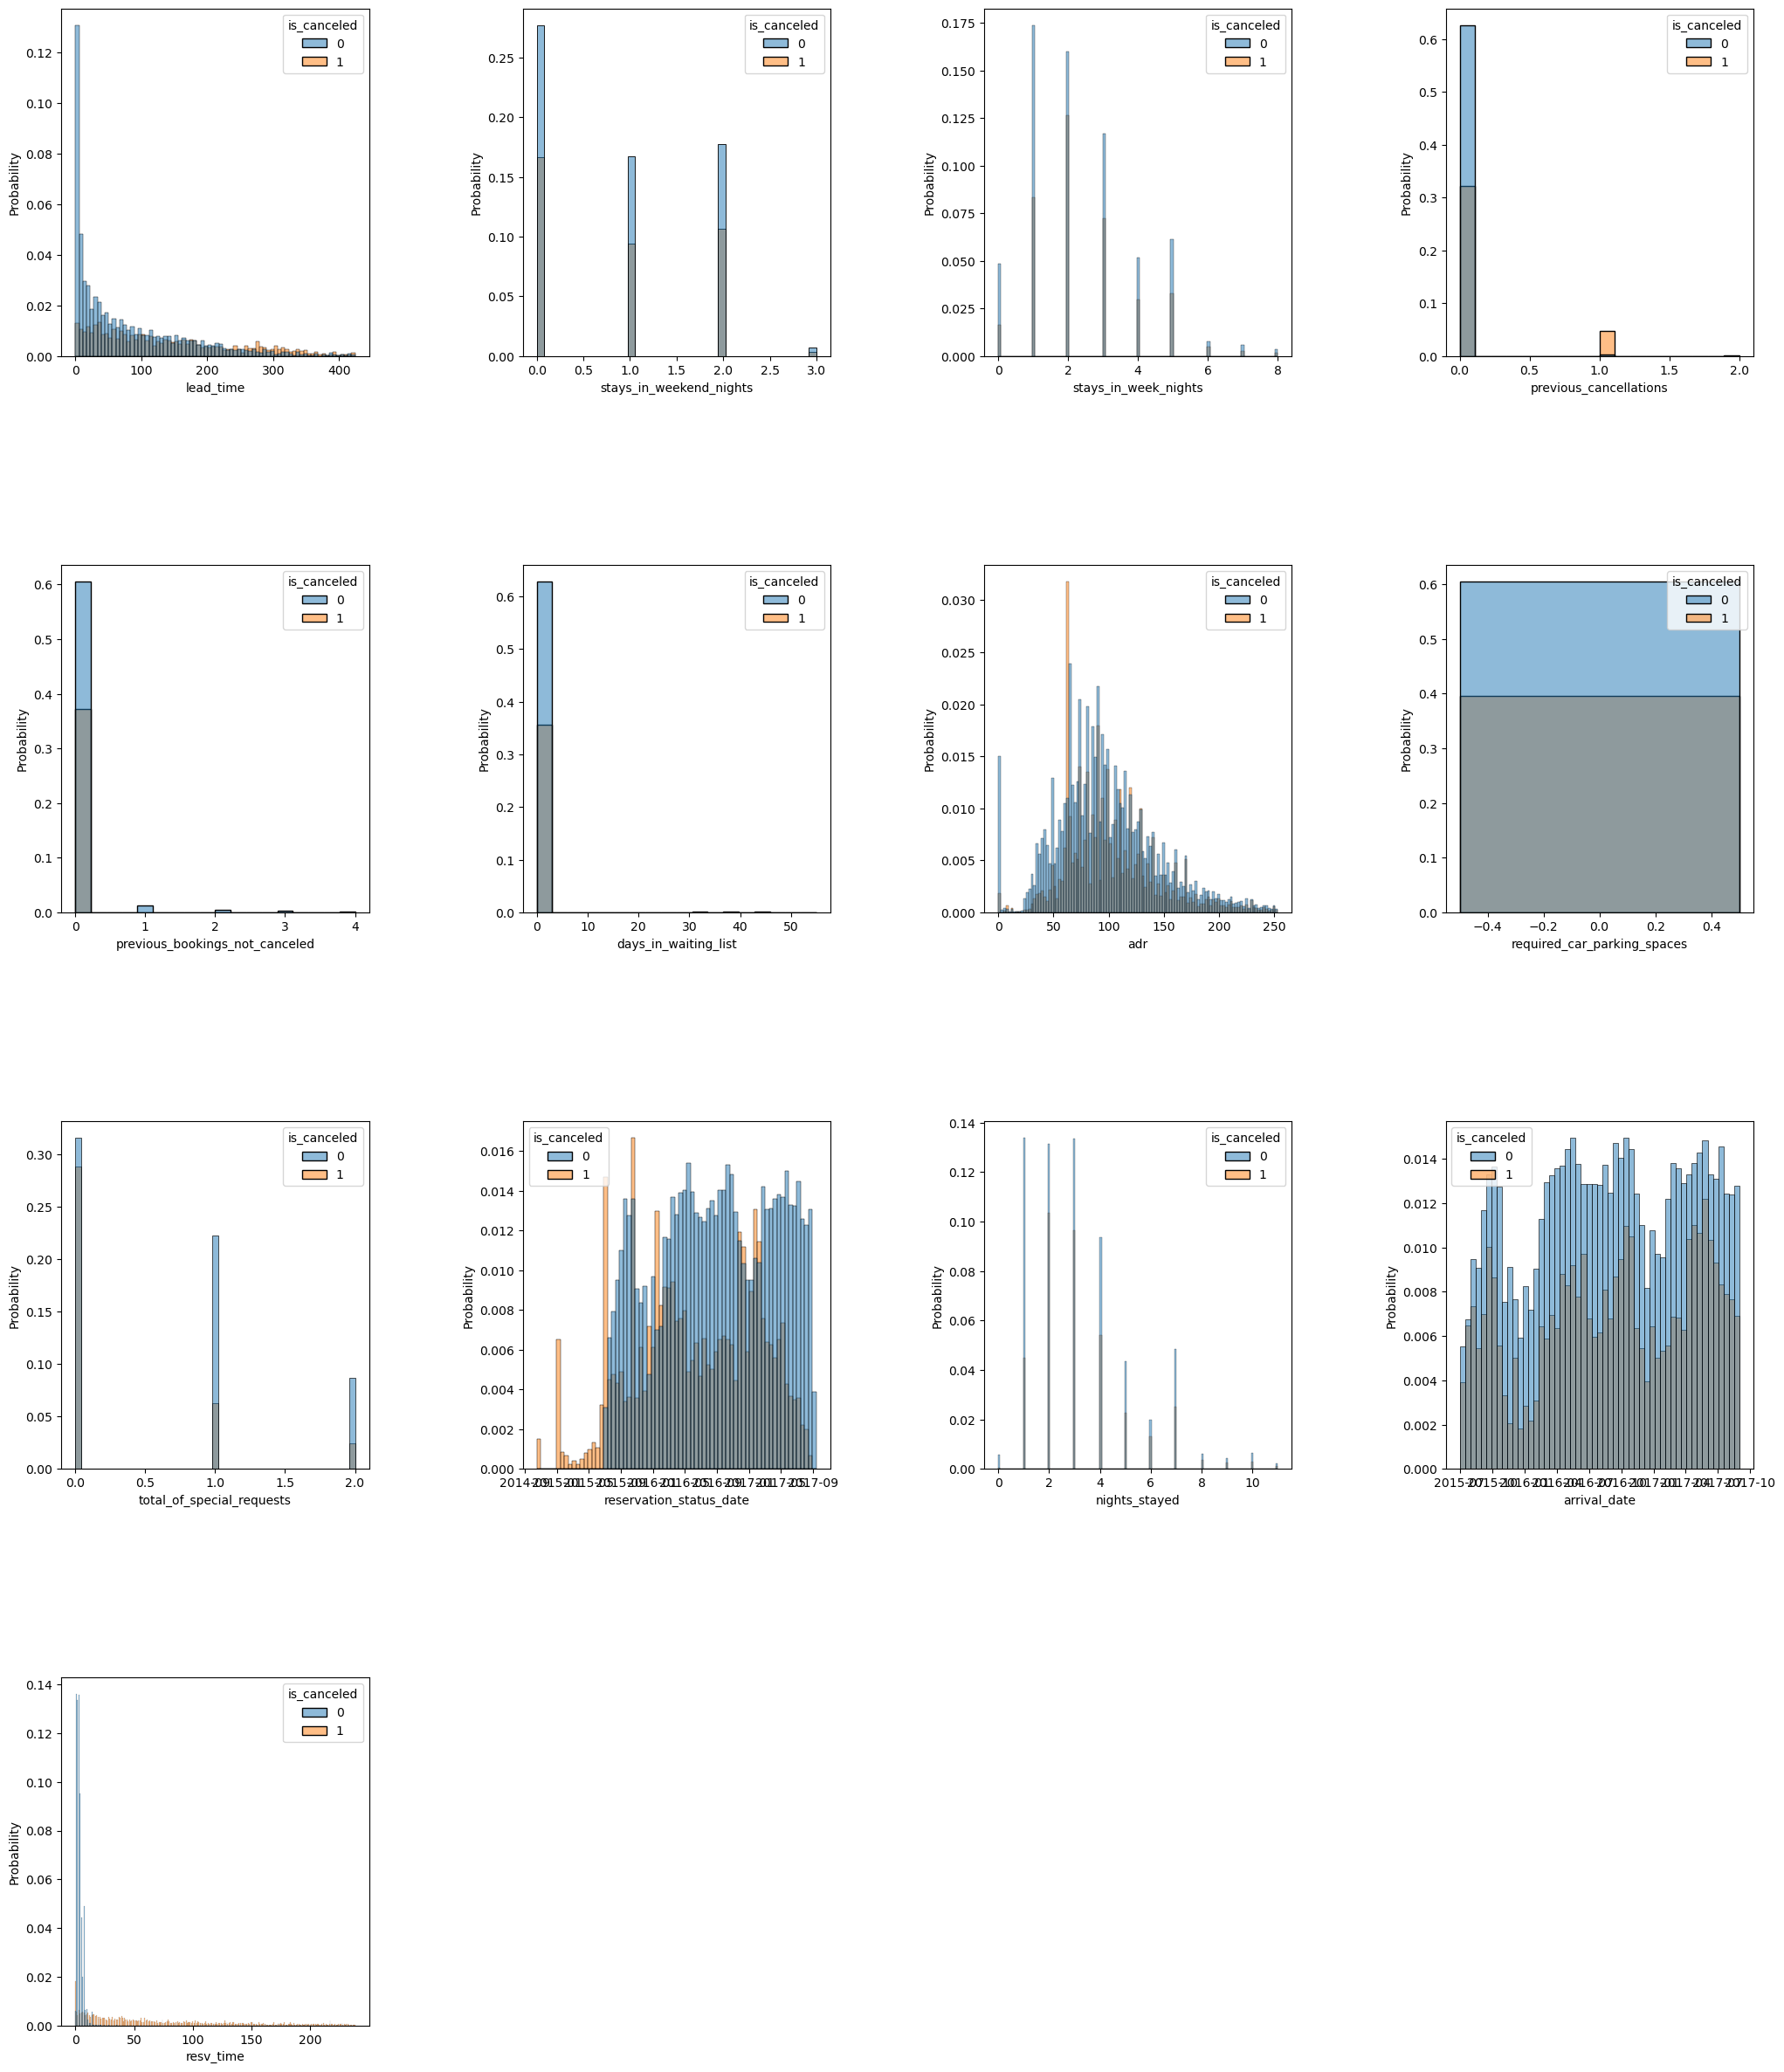

In [71]:
histplots(cts, ncol=4, figsize=(25, 30))

In [73]:
# seems like resv_time is an important variable

In [72]:
# save df2 (not df2_ohe b/c we're dropping the last variable for modelling)
# make sure dtype is correct
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119385
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119386 non-null  object        
 1   is_canceled                     119386 non-null  int64         
 2   lead_time                       119386 non-null  float32       
 3   stays_in_weekend_nights         119386 non-null  float32       
 4   stays_in_week_nights            119386 non-null  float32       
 5   adults                          119386 non-null  int64         
 6   children                        119386 non-null  int32         
 7   babies                          119386 non-null  int64         
 8   meal                            119386 non-null  object        
 9   country                         119386 non-null  object        
 10  market_segment                  119386 non-null  object 

In [74]:
# save file as csv
#datagy.io/pandas-dataframe-to-csv/#Working-with-Dataframe-Index-When-Exporting-Pandas-to-CSV

df2.to_csv('bookings_eda.csv', date_format='%Y-%m-%d')